# Homework 1

In this assignment, we will be exploring the car dataset and analyzing their fuel efficiency. <br >
Specifically, we will do some exploratory analysis with visualizations, then we will build a model for Simple Linear Regression, a model for Polynomial Regression, and one model for Logistic Regression. <br >
**The given dataset is already modified and cleaned**, but you can find [the original information here.](https://archive.ics.uci.edu/ml/datasets/auto+mpg).

## Dataset Attribute Information

1. **mpg**: Miles per gallon. This is one primary measurement for car fuel efficiency.
2. **displacement** : The cylinder volumes in cubic inches.
3. **horsepower** : Engine power.
4. **weight** : In pounds.
5. **acceleration** : The elapsed time in seconds to go from 0 to 60mph.
6. **origin** : Region of origin.

### Libraries that can be used: numpy, pandas, scikit-learn, seaborn, plotly, matplotlib
Any libraries used in the discussion materials are also allowed.

#### Other Notes
 - Don't worry about not being able to achieve high accuracy, it is neither the goal nor the grading standard of **this** assignment. <br >
 - If not specified, you are not required to do hyperparameter tuning, but feel free to do so if you'd like.
 - Discussion materials should be helpful for doing the assignments.

# Exercises
## Exercise 1 - Exploratory Analysis (20 points in total)

### Exercise 1.1 - Correlation Matrix (10 points)
Generate a Pearson [correlation matrix plot](https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07) in the form of a heatmap. See the link to have an idea about what this visualization should look like. <br >
After generating the plot, answer the following question: <br >
**If we are going to predict ``mpg`` in Simple Linear Regression(i.e., $y=ax+b$), which attribute are you most UNLIKELY to pick as the independent variable? Explain why.**

Requirements & notes
 - When computing correlation, make sure to drop the column ``origin`` to avoid errors.
 - The computed correlation values should be shown on the plot.
 - Use a diverging color scale with the color range being \[-1, 1\] and center being 0 (if applicable).

In [71]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, precision_score, recall_score

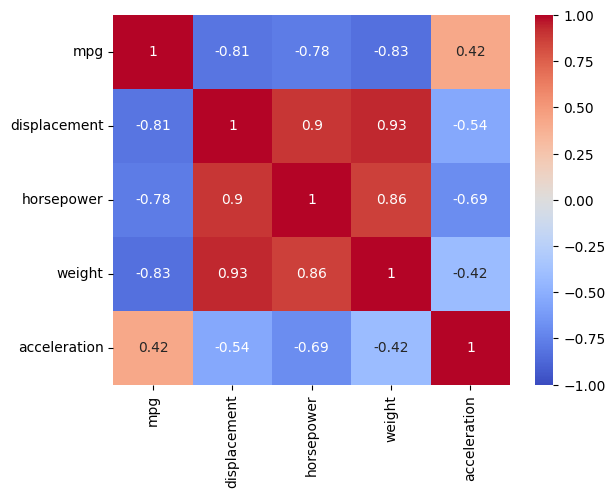

In [73]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/sample_data/auto-mpg.csv')
dropped_origin_data = data.drop('origin', inplace=False, axis=1)
correlation_matrix = dropped_origin_data.corr()
sns.heatmap(correlation_matrix, annot=True, vmin=-1,vmax=1,center=0,cmap='coolwarm')
plt.show()


The most unlikely attribute to pick with respect to predicting `mpg` is `acceleration` with a correlation of `.42` this is because it is the closest value to zero of all the attributes. The correlation closest to zero shows the least linear relationship between two variables.

### Exercise 1.2 - Pairplot (10 points)
Generate a pairplot(a.k.a. scatter plot matrix) of the given dataset. <br >
After generating the plot, answer the following question: <br >
**If we are using ``horsepower`` to predict ``mpg``, which method could lead to the best performance? (Linear Regression, Polynomial Regression, or Logistic Regression) Explain why.**

Note that there is no requirement on the diagonals. You can leave empty or use other representations based on your preference. However, having ``origin``-based grouped data distributions on the diagonals effectively helps you answer some questions in the later exercises.   

Requirements
 - The points should be colored based on the column ``origin``.

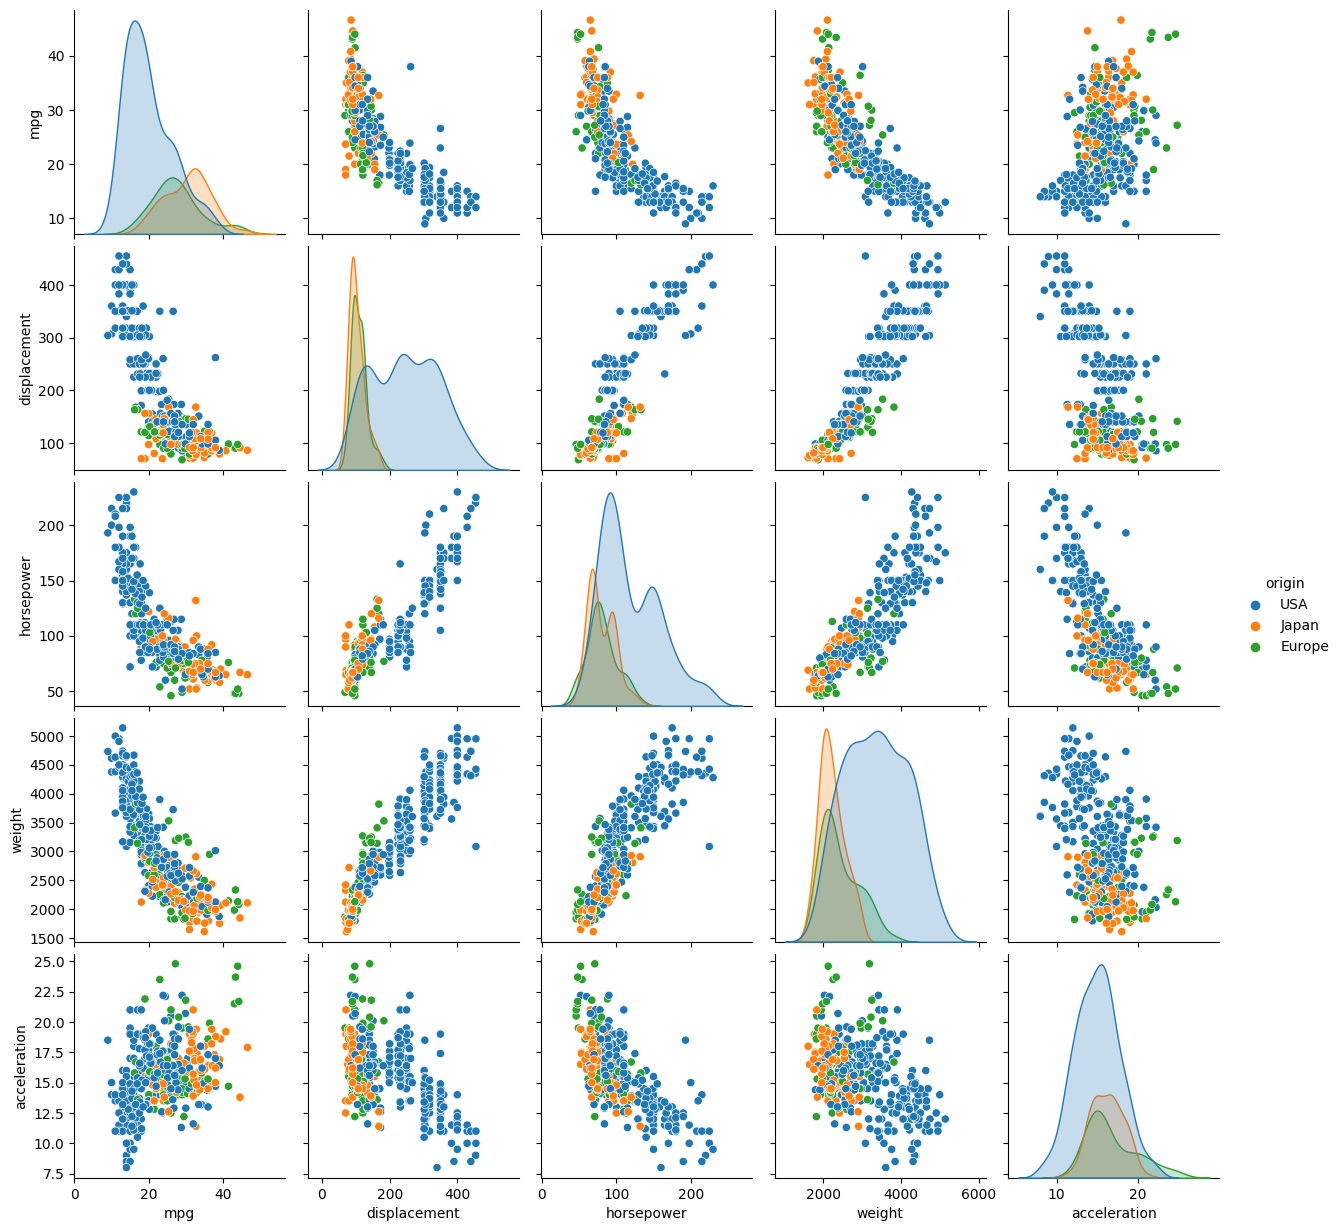

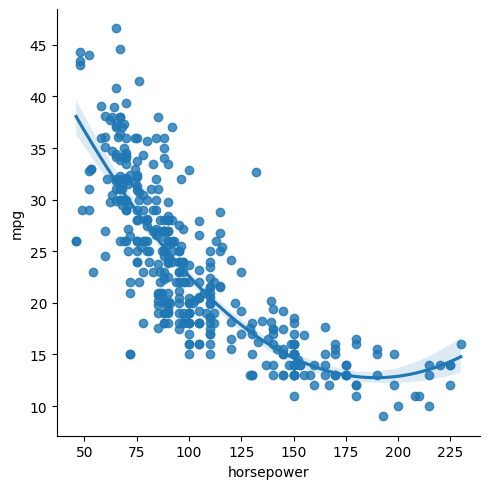

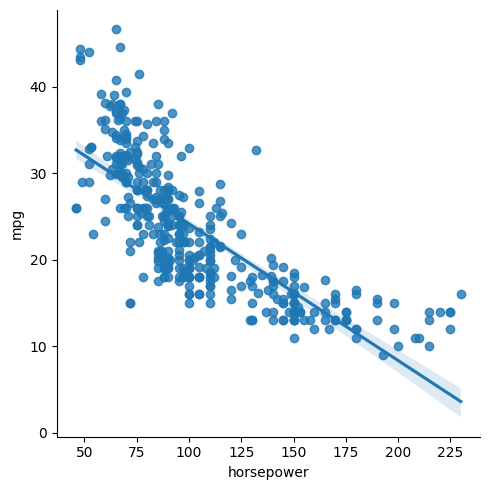

In [5]:
sns.pairplot(data, hue='origin')
sns.lmplot(x='horsepower',y='mpg',data=data,order=2)
sns.lmplot(x='horsepower',y='mpg',data=data)

plt.show()


The `mpg` variable is not binary, therefore logistic regression would not provide valuable information on the relationship of the two variables. The best performance would be **polynomial regression** because the relationship is not linear, as `mpg` seems to level out as `horsepower` increases.

## Exercise 2 - Linear and Polynomial Regression (40 points in total)

### Exercise 2.1 - Splitting Dataset (5 points)
Split the data into training and testing set with the ratio of 80:20.

In [74]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/sample_data/auto-mpg.csv')

X = dropped_origin_data.drop('mpg', axis=1)
y = data['mpg']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=42)

### Exercise 2.2 - Simple Linear Regression (10 points)
Using one of the other attributes(excluding ``origin``) by your choice, please build a simple linear regression model that predicts ``mpg``. <br >

Requirements
 - Report the testing MSE error.

21.23


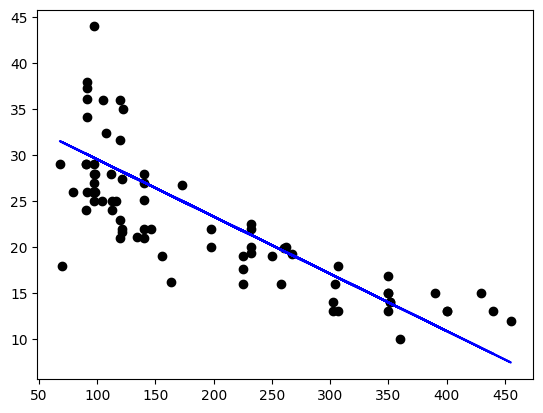

In [75]:
regression = LinearRegression()
regression.fit(X_train[['displacement']], y_train)
y_pred = regression.predict(X_test[['displacement']])
mse = mean_squared_error(y_test, y_pred)
print(round(mse,2))
plt.scatter(X_test[['displacement']], y_test, color="black")
plt.plot(X_test[['displacement']], y_pred, color="blue")


The testing mean squared error is 21.23

### Exercise 2.3 - Polynomial Regression (25 points)
Build polynomial regression models that predict ``mpg`` with the same choice in 2.2. <br >
Specifically, from degree=2 to degree=4, build one respectively. <br >
Then, based on the reported errors from only these three degrees, **do you think there is a sign of overfitting? Provide your reasoning.**


Requirements
 - Report the training MSE error for each of the three degrees.
 - Report the testing MSE error for each of the three degrees.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


Degree 2: Training MSE 18.633934372172746, Testing MSE 20.649054718307305


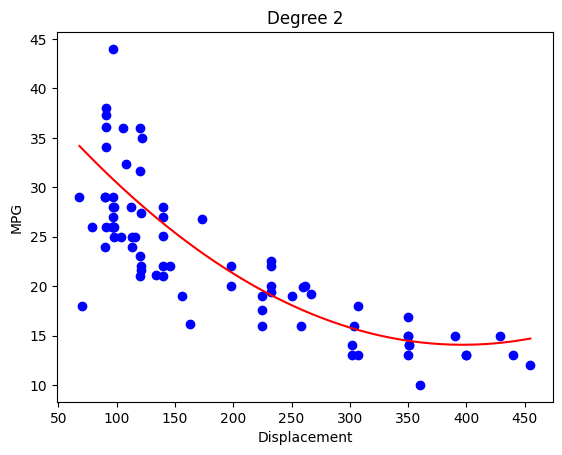

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


Degree 3: Training MSE 18.535440028244075, Testing MSE 20.81794078857357


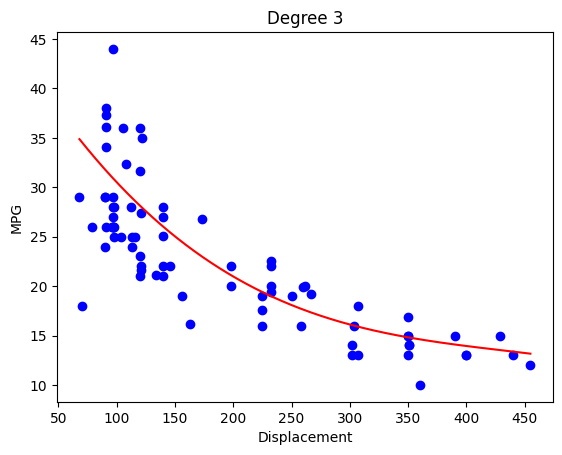

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


Degree 4: Training MSE 18.522485947767198, Testing MSE 20.88841279063398


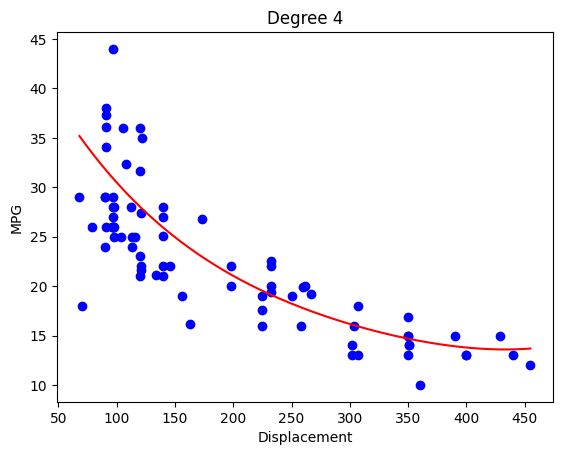

In [76]:
degrees = [2,3,4]
displacement_range = np.linspace(X_test['displacement'].min(), X_test['displacement'].max(), 1000)
displacement_range = displacement_range.reshape(-1, 1)
for deg in degrees:

    poly = PolynomialFeatures(degree=deg)
    X_poly_train = poly.fit_transform(X_train[['displacement']])
    X_poly_test = poly.transform(X_test[['displacement']])
    X_poly_range = poly.transform(displacement_range)

    poly_reg = LinearRegression()
    poly_reg.fit(X_poly_train, y_train)

    y_pred_train = poly_reg.predict(X_poly_train)
    y_pred_test = poly_reg.predict(X_poly_test)
    y_pred_range = poly_reg.predict(X_poly_range)

    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)

    print(f'Degree {deg}: Training MSE {mse_train}, Testing MSE {mse_test}')

    plt.scatter(X_test[['displacement']], y_test, color='blue')
    plt.plot(displacement_range, y_pred_range, color='red')  # Plot the predicted values for the range
    plt.title(f'Degree {deg}')
    plt.xlabel('Displacement')
    plt.ylabel('MPG')
    plt.show()









Yes there are signs of overfitting because `mse_test` is greater than `mse_train`

## Exercise 3 - Logistic Regression (40 points in total)

Now we are going to build a classification model on ``origin`` using all the other 5 attributes. <br >
Note that Logistic Regression is a binary classificaiton algorithm.

### Exercise 3.1 - Processing and Splitting the Dataset (5 points)
In this exercise 3, we only consider those observations where they originate from either "USA" or "Japan". <br >
So please **remove** those observations that originate from "Europe". <br >
And then, split the data into training and testing set with the ratio of 80:20. <br >


In [77]:
data.drop(data[data['origin'] == 'Europe'].index, inplace=True)
X = data.drop('origin', axis=1)
y = data['origin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Exercise 3.2 - Logistic Regression (20 points)

Using all the other 5 attributes, please build a Logistic Regression model that distinguishes between cars from Japan and cars from the USA. <br >
Then, **if we are distinguishing between Japan and Europe this time, how do you think the model performance(in terms of accuracy) will change? Provide your reasoning.**

Requirements
 - Report the testing precision and recall for both regions.

In [79]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)
precision_japan = precision_score(y_test, y_pred, pos_label='Japan')
recall_japan = recall_score(y_test, y_pred, pos_label='Japan')

print(f"Precision Japan: {precision_japan}")
print(f"Recall Japan: {recall_japan}")

precision_usa = precision_score(y_test, y_pred, pos_label='USA')
recall_usa = recall_score(y_test, y_pred, pos_label='USA')

print(f"Precision USA: {precision_usa}")
print(f"Recall USA: {recall_usa}")


Precision Japan: 0.7619047619047619
Recall Japan: 0.9411764705882353
Precision USA: 0.9772727272727273
Recall USA: 0.8958333333333334


Precision Japan: 0.7619047619047619
Recall Japan: 0.9411764705882353<br>
Precision USA: 0.9772727272727273
Recall USA: 0.8958333333333334<br>
Accuracy = (true positives + true negatives) / total<br><br>
if we calculate (tp JP + tp EU) then precision is proportion of correct classification of predicted observations while recall is correct classifications of actual instances. <br>
For Japan:<br>
Precision: 0.6666666666666666<br>
Recall: 0.625<br>
For Europe:<br>
Precision: 0.6<br>
Recall: 0.6428571428571429<br>

Because the precision for Japan is higher than the precision for Europe, the model is more accurate at classifying instances as Japan versus Japan and USA.


### Exercise 3.3 - Model coefficients (10 points)

Using all the attributes used in 3.2, plot the model coefficients in a scatter plot as shown in class. Explain the contribution of the top 3 coefficients, and interpret their meaning and their contribution to the $\hat{y}$ prediction. Example can be found [here](https://quantifyinghealth.com/interpret-logistic-regression-coefficients/)

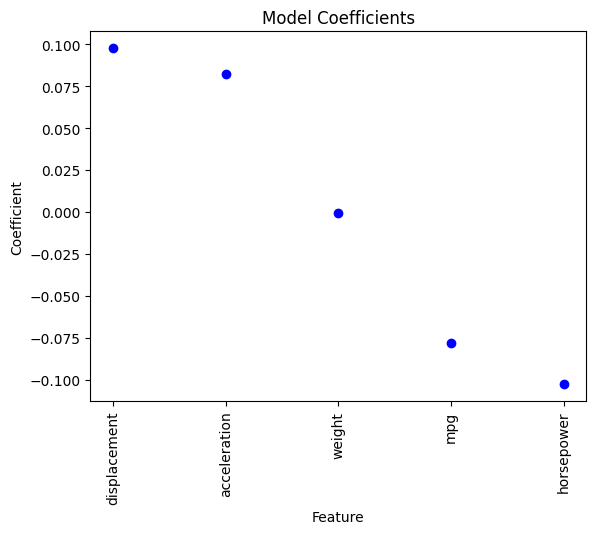

In [80]:
feature_names = X.columns.tolist()

coefficients = logistic_regression.coef_[0]

sorted_indices = np.argsort(coefficients)[::-1]
sorted_coefficients = coefficients[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

plt.scatter(range(len(sorted_coefficients)), sorted_coefficients, color='blue')
plt.xticks(range(len(sorted_coefficients)), sorted_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Model Coefficients')
plt.show()

The top 3 attribute coefficients are displacement, acceleration, and weight respectively. <br>
The coefficients indicates the strength that the attribute has on predicting the correct classification.

### Exercise 4 - Collaborative Statement (5 points)

It is mandatory to include a Statement of Collaboration in each submission, that follows the guidelines below.
Include the names of everyone involved in the discussions (especially in-person ones), and what was discussed.
All students are required to follow the academic honesty guidelines posted on the course website. For
programming assignments in particular, I encourage students to organize (perhaps using Piazza) to discuss the
task descriptions, requirements, possible bugs in the support code, and the relevant technical content before they
start working on it. However, you should not discuss the specific solutions, and as a guiding principle, you are
not allowed to take anything written or drawn away from these discussions (no photographs of the blackboard,
written notes, referring to Piazza, etc.). Especially after you have started working on the assignment, try to restrict
the discussion to Piazza as much as possible, so that there is no doubt as to the extent of your collaboration.

I did not collaborate with anyone for this assignment.